# What are Agents?

What is compute =  It is a generic term used to reference processing power, memory, networking, storage, and other resources required for the computational success of any program.

* Transformers
* LLMs = Transformers + Compute
* Agents = Transformers + Compute + Reasoning + Feedback --> loop --> Result

# Why Crew AI?

It had the first mover advantage.

Other Agentic AI Framework to follow in 2025:
- [AutoGen](https://www.microsoft.com/en-us/research/project/autogen/)
- [Pydantic AI](https://ai.pydantic.dev/)

## Step 1: Create Your Crew
Define custom Agents with flexible Roles and Goals – whether for data research, automation, or content generation, crewAI puts you in control.


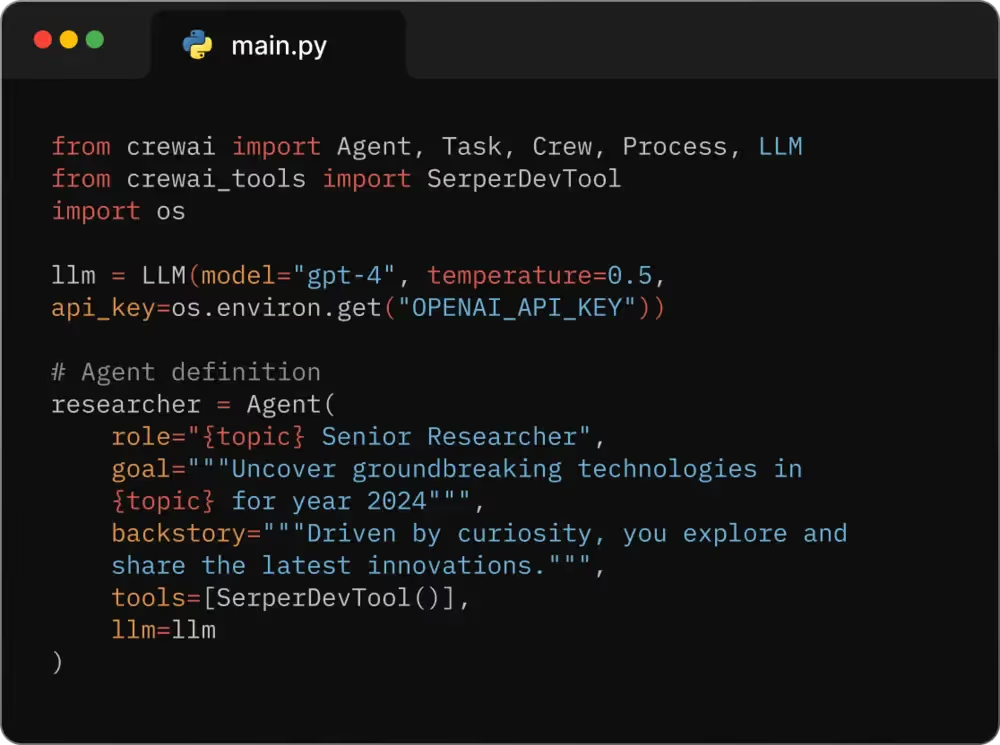

## Step 2: Define Tasks
Assign tasks to your agents, clearly defining what they need to accomplish. Ensure seamless collaboration by setting clear instructions and expected outcomes.

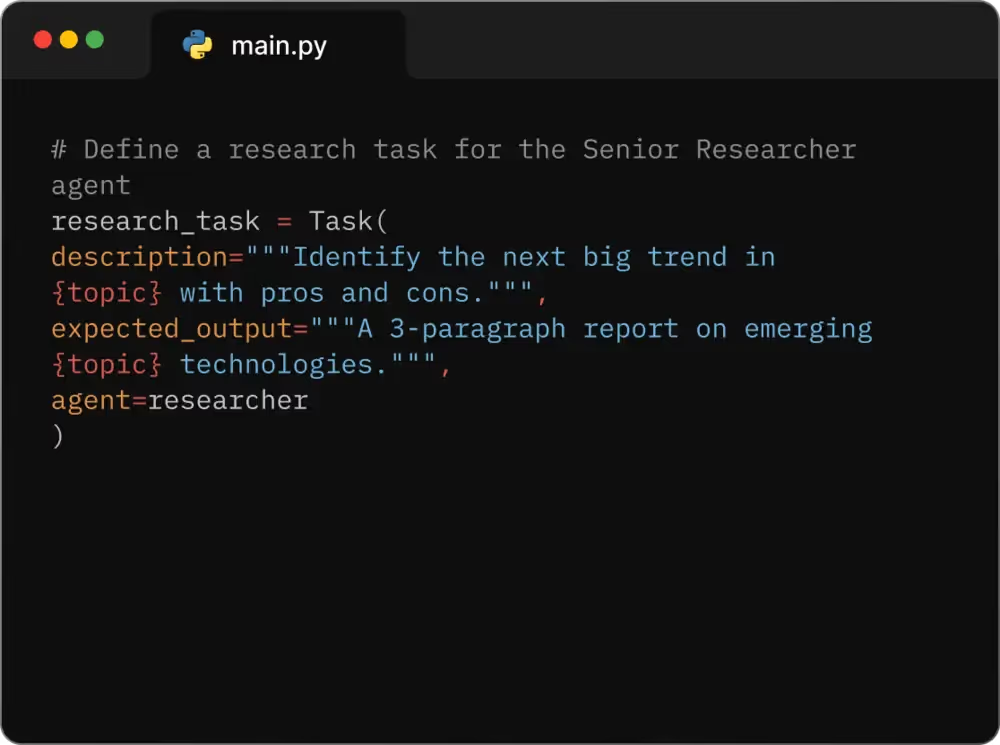

## Step 3: Kickoff
Launch your crew into action with a single command. Monitor progress in real-time and receive the results directly, ready for review.

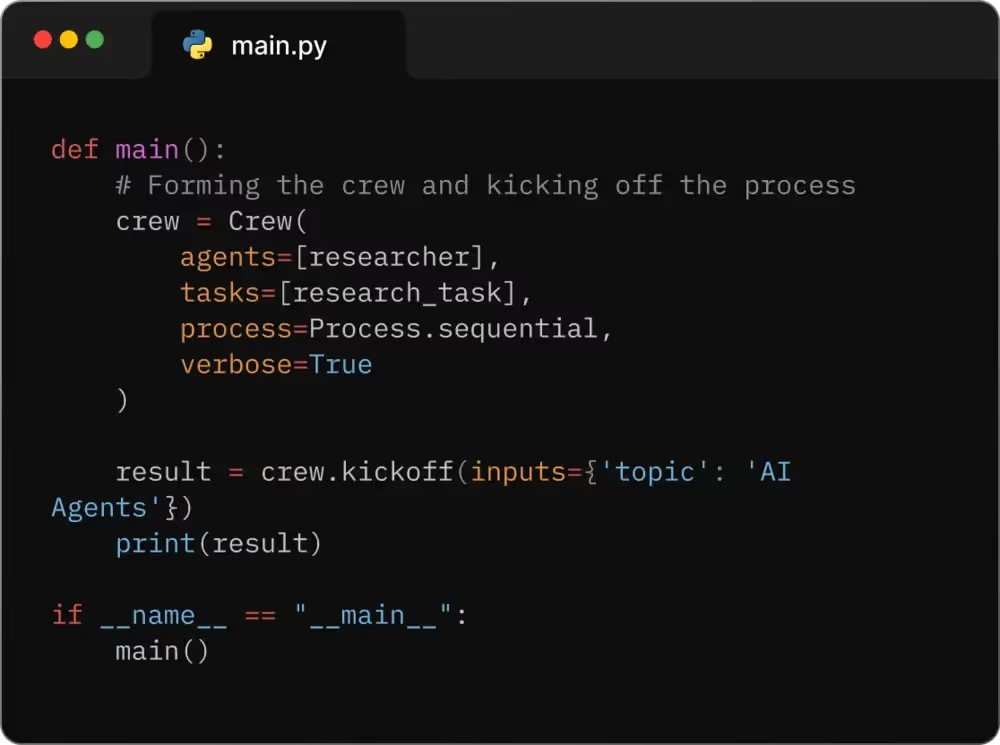

# The Crew Framework

The Crew framework is a structured system for collaborative work among AI agents. AI agents are intelligent entities that communicate, delegate, and interact dynamically. Processes organize agent interactions, task assignments, and feedback loops. Tasks are defined units of work, possibly specifying required tools or agents. Tools are external resources that aid task completion.

Workflow: Agents collaborate → process organizes interactions → tasks are assigned → agents use tools to complete tasks → outcomes are produced.

# The Mental Framework for AI Agents


| Component | Mental Framework                     | Key Features                                              |
|-----------|---------------------------------|-----------------------------------------------------------|
| Crew      | The top-level organization/department      | - Manages AI agent teams<br>- Oversees workflows<br>- Ensures collaboration<br>- Delivers outcomes |
| AI Agents | Specialized team members        | - Have specific roles <br>- Use designated tools<br>- Can delegate tasks<br>- Make autonomous decisions |
| Process   | Workflow management system      | - Defines collaboration patterns<br>- Controls task assignments<br>- Manages interactions<br>- Ensures efficient execution |
| Tasks     | Individual assignments          | - Have clear objectives<br>- Use specific tools<br>- Feed into larger process<br>- Produce actionable results |

- Data Science Product Research Department (Crew)
  - Market Research (Agent)
  - Data Analyst (Agent)
  - Data Scientist (Agent)
  - Manager (Orchestrating Agent)
  

  - Tasks
    - Finding new improvements in existing systems/processes
    - Collecting data
        - Internet Search Capability (Tools)
        - Web Scraping Capability (Tools)
        - Storage organization Capability (Tools)

    - Analyzing data
    - RnD on new tech
    - Creating reports
    - Publishing reports & data

## Installation:

In [10]:
# 1️⃣ Install required packages
!pip install crewai crewai-tools langchain-google-genai -q

## 🚀 **Content Creation Workflow**

In [22]:
import os
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool
from google.colab import userdata

# Initialize Gemini LLM
gemini_llm = LLM(
    model="gemini/gemini-2.5-flash",
    api_key=userdata.get('GOOGLE_API_KEY')
)

# Load Serper API key
serper_api_key = userdata.get('SERPER_API_KEY')
os.environ["SERPER_API_KEY"] = serper_api_key

# Initialize search tool
search_tool = SerperDevTool()

# Define Agents
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory=(
        "You're planning a blog article on the topic: {topic}. "
        "You collect informative content to educate the audience and enable informed decisions."
    ),
    verbose=True,
    allow_delegation=False,
    tools=[search_tool],
    llm=gemini_llm
)

writer = Agent(
    role="Content Writer",
    goal="Write an insightful, factually accurate opinion piece about {topic}",
    backstory=(
        "You're writing an opinion piece based on the planner's outline. "
        "You clearly differentiate objective statements from opinions."
    ),
    verbose=True,
    allow_delegation=True,
    llm=gemini_llm
)

editor = Agent(
    role="Editor",
    goal="Edit blog posts aligning with the organization's style",
    backstory=(
        "You review blog posts ensuring journalistic best practices, balanced viewpoints, and avoidance of controversial issues."
    ),
    verbose=True,
    allow_delegation=True,
    llm=gemini_llm
)

# Define Tasks
plan_task = Task(
    description=(
        "1. Highlight latest trends, key players, and notable news on {topic}.\n"
        "2. Identify target audience interests and challenges.\n"
        "3. Create detailed content outline (intro, main points, CTA).\n"
        "4. Include SEO keywords and relevant resources."
    ),
    expected_output="Detailed content plan including outline, audience analysis, SEO keywords, and resources.",
    agent=planner
)

write_task = Task(
    description=(
        "1. Write compelling blog post using content plan.\n"
        "2. Integrate SEO keywords naturally.\n"
        "3. Create engaging and descriptive sections/subtitles.\n"
        "4. Structure clearly (introduction, body, conclusion).\n"
        "5. Proofread for grammar and brand voice consistency."
    ),
    expected_output="Markdown formatted, publication-ready blog post with structured paragraphs.",
    agent=writer
)

edit_task = Task(
    description="Proofread the blog post for grammar, clarity, and alignment with brand voice.",
    expected_output="Finalized markdown blog post, ready for publication.",
    agent=editor
)

# Create Crew and run workflow sequentially
content_crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan_task, write_task, edit_task],
    process=Process.sequential,
    verbose=True
)

# Kickoff workflow
topic_input = {"topic": "Artificial Intelligence"}
result = content_crew.kickoff(inputs=topic_input)


╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 8b992b12-1724-45ee-bfc2-dc6fbfe8aafd                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│  Task: 1. Highlight latest trends, key players, and notable news on Artificial Intelligence.                    │
│  2. Identify target audience interests and challenges.                                                          │
│  3. Create detailed content outline (intro, main points, CTA).                                                  │
│  4. Include SEO keywords and relevant resources.                                                                │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│  Thought: Thought: I need to gather more information to fully address the "notable news" aspect and ensure the  │
│  "key players" list is comprehensive. I also need to think about the "latest trends" more broadly.              │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│  Thought: Thought: The search results provide a good overview of the latest AI trends and some notable news     │
│  from 2023-2024, including generative AI's growth, AI in scientific discovery, cybersecurity, and regulatory    │
│  frameworks. I also see mentions of multimodal AI and advancements in deep learning and NLP. I have a good      │
│  starting point for trends and news. Now I need to focus on identifying key players, target audience interests  │
│  and challenges, and then structure the content outline and SEO keywords.                                       │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│  Thought: Thought: I have a good list of key players (companies and researchers). Now I need to identify the    │
│  target audience interests and challenges and then proceed with creating the detailed content outline, SEO      │
│  keywords, and relevant resources. I will make an educated guess about the target audience based on the         │
│  general topic of Artificial Intelligence and the goal to "educate the audience and enable informed             │
│  decisions."                                                                                                    │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Task: 1. Write compelling blog post using content plan.                                                        │
│  2. Integrate SEO keywords naturally.                                                                           │
│  3. Create engaging and descriptive sections/subtitles.                                                         │
│  4. Structure clearly (introduction, body, conclusion).                                                         │
│  5. Proofread for grammar and brand voice consistency.                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: a267bb6a-7a8e-4955-afba-3038c08c0e92                                                                     │
│  Agent: Content Planner                                                                                         │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  # AI Unpacked: Navigating the Intelligence Revolution – Trends, Players, and Ethical Frontiers                 │
│                                                                                                                 │
│  The landscape of human innovation is undergoing a seismic shift, powered by the transformative force of        │
│  **Artificial Intelligence**. From powering our daily digital interactions to accelerating scientific           │
│  breakthroughs, AI is not just a technological trend; it is a pervasive presence reshaping modern life. At its  │
│  core, **Artificial Intelligence** refers to the development of computer systems capable of performing tasks    │
│  that typically require human intelligence, such as learning, problem-solving, decision-making, perception,     │
│  and understanding language. This article aims to provide a comprehensive, balanced, and actionable             │
│  understanding of AI's current state, key players, ethical considerations, and future trajectory, empowering    │
│  you, the reader, to make informed decisions. We will explore the latest **AI trends**, spotlight the major     │
│  **AI companies** and influential figures, delve into recent **AI news**, examine the profound **AI impact**    │
│  and its benefits, confront the **AI challenges** and ethical dilemmas, and finally, guide you on how to        │
│  navigate this intelligence revolution responsibly.                                                             │
│                                                                                                                 │
│  ## The Pulsating Heart of Innovation: Latest AI Trends (2023-2024)                                             │
│                                                                                                                 │
│  The pace of **AI innovation** is breathtaking, with several **AI breakthroughs** defining the current era.     │
│  Understanding these trends is crucial to grasping the **future of AI**.                                        │
│                                                                                                                 │
│  ### Generative AI's Explosion                                                                                  │
│                                                                                                                 │
│  Perhaps the most talked-about development is the rise of **Generative AI**. This class of AI can create new    │
│  content, from text and images to code and music, rather than just analyzing existing data.                     │
│  *   **Large Language Models (LLMs)** like OpenAI's ChatGPT and Google Gemini have revolutionized how we        │
│  interact with information, offering advanced capabilities in content creation, coding assistance,              │
│  summarization, and translation. Their ability to understand and generate human-like text is, objectively       │
│  speaking, unprecedented.                                                                                       │
│  *   **Diffusion models**, such as Midjourney and DALL-E, have equally transformed digital art and design,      │
│  generating photorealistic images from simple text prompts. These tools are democratizing creative processes,   │
│  allowing individuals without specialized design skills

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: cfdf9613-1da6-49c7-8b29-ccb0439b736d                                                                     │
│  Agent: Content Writer                                                                                          │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Output()

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Task: Revise the blog post to remove subjective phrasing, personal opinions, and loaded language to align      │
│  with journalistic best practices, maintain a balanced viewpoint, and ensure a professional brand voice. Focus  │
│  on presenting information factually and neutrally.                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.903036178s.


Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please 
check your plan and billing details. For more information on this error, head to: 
https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: 
https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: 
generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease 
retry in 46.903036178s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 
'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 
'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 
'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 
'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 
'gemini-2.5-flash'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': 
'46s'}]}}

An unknown error occurred. Please check the details below.


An unknown error occurred. Please check the details below.

Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 46.903036178s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.903036178s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│  Task: Revise the blog post to remove subjective phrasing, personal opinions, and loaded language to align      │
│  with journalistic best practices, maintain a balanced viewpoint, and ensure a professional brand voice. Focus  │
│  on presenting information factually and neutrally.                                                             │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.812354179s.


An unknown error occurred. Please check the details below.

Output()

Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please 
check your plan and billing details. For more information on this error, head to: 
https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: 
https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: 
generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease 
retry in 46.812354179s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 
'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 
'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 
'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 
'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 
'gemini-2.5-flash'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': 
'46s'}]}}

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.812354179s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.718873416s.


An unknown error occurred. Please check the details below.
Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 46.718873416s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.718873416s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Editor                                                                                                  │
│                                                                                                                 │
│  Thought: Thought: The current task is to proofread the blog post for grammar, clarity, and alignment with the  │
│  brand voice, ensuring journalistic best practices, balanced viewpoints, and avoidance of controversial         │
│  issues.                                                                                                        │
│  Looking at the provided blog post, I notice several instances of subjective phrasing, personal opinions, and   │
│  loaded language (e.g., "objectively speaking," "In my opinion," "which many consider," "It is my firm belief   │
│  that," "without a doubt," "ignoring these would be profoundly irresponsible," "which I believe will unlock     │
│  solutions," "It offers humanity unprecedented capabilities," "these are currently speculative rather than      │
│  immediate threats," "It is my firm belief that AI should serve humanity, not supersede it.").                  │
│  The brand voice guidelines for an Editor state: "journalistic best practices, balanced viewpoints, and         │
│  avoidance of controversial issues." The presence of personal opinions and strong subjective statements goes    │
│  against these guidelines, as they can introduce bias and detract from a balanced, objective journalistic       │
│  tone. These statements also make the text less clear and more informal, which might not align with a           │
│  professional brand voice for a blog post aimed at professionals, students, and curious individuals seeking an  │
│  "actionable understanding."                                                                                    │
│  I need to remove these subjective statements to ensure the blog post adheres to journalistic best practices,   │
│  maintains a balanced viewpoint, and aligns with a professional brand voice. I can revise these sentences to    │
│  present the information factually or attribute the opinions to a general consensus or expert view without      │
│  inserting a personal voice.                                                                                    │
│  Since my role is Editor, and the task involves significant content revision to align with brand voice and      │
│  journalistic practices, this is a task that would typically be performed by a Content Writer under my          │
│  direction. I will delegate this task to the Content Writer, providing clear instructions on what needs to be   │
│  changed and why, referencing the specific examples I found.                                                    │
│                                                                                                                 │
│  Using Tool: Delegate work to coworker                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  {                                                                                                              │
│    "task": "Revise the blog post to remove subjective phrasing, personal opinions, and loaded language to       │
│  align with journalistic best practices, maintain a balanced viewpoint, and ensure a professional brand voice.  │
│  Focus on presenting information factually and neutrally.",                                                     │
│    "context": "The current blog post contains several instances of subjective phrasing and personal opinions    │
│  that go against our brand's journalistic best practices, which require balanced viewpoints and avoidance of    │
│  controversial issues. Please identify and rephrase sentences containing phrases such as 'objectively           │
│  speaking,' 'In my opinion,' 'which many consider,' 'It is my firm belief that,' 'without a doubt,' 'ignoring   │
│  these would be profoundly irresponsible,' 'which I believe will unlock solutions,' 'It offers humanity         │
│  unprecedented capabilities,' 'these are currently speculative rather than immediate threats,' and 'It is my    │
│  firm belief that AI should serve humanity, not supersede it.' The goal is to present information factually     │
│  and neutrally. For example, instead of 'Their ability to understand and generate human-like text is,           │
│  objectively speaking, unprecedented,' rephrase to something like 'Their ability to understand and generate     │
│  human-like text is widely regarded as unprecedented.' Or, 'In my opinion, this approach promises...' should    │
│  be 'This approach promises...' or 'Experts suggest this approach promises...'. Make sure to eliminate any 'I   │
│  believe/my opinion' statements. Once these revisions are made, the blog post should be proofread for grammar   │
│  and clarity.",                                                                                                 │
│    "coworker": "Content Writer"                                                                                 │
│  }                                                                                                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  Error executing task with agent 'content writer'. Error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429,       │
│  'message': 'You exceeded your current quota, please check your plan and billing details. For more information  │
│  on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage,      │
│  head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric:                                   │
│  generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model:                       │
│  gemini-2.5-flash\nPlease retry in 46.718873416s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type':       │
│  'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url':  │
│  'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type':                                              │
│  'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric':                                  │
│  'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId':                            │
│  'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'model': 'gemini-2.5-flash',          │
│  'location': 'global'}, 'quotaValue': '20'}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo',            │
│  'retryDelay': '46s'}]}}                                                                                        │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.616973594s.


An unknown error occurred. Please check the details below.
Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 46.616973594s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.616973594s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.535525524s.


An unknown error occurred. Please check the details below.
Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 46.535525524s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.535525524s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Editor                                                                                                  │
│                                                                                                                 │
│  Task: Proofread the blog post for grammar, clarity, and alignment with brand voice.                            │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

ERROR:root:Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. 
* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash
Please retry in 46.455233733s.


An unknown error occurred. Please check the details below.
Error details: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 20, model: gemini-2.5-flash\nPlease retry in 46.455233733s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 

╭─────────────────────────────────────────────────── LLM Error ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  ❌ LLM Call Failed                                                                                             │
│  Error: Google Gemini API error: 429 - You exceeded your current quota, please check your plan and billing      │
│  details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To    │
│  monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit.                                      │
│  * Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit:     │
│  20, model: gemini-2.5-flash                                                                                    │
│  Please retry in 46.455233733s.                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── Execution Traces ────────────────────────────────────────────────╮
│                                                                                                                 │
│  🔍 Detailed execution traces are available!                                                                    │
│                                                                                                                 │
│  View insights including:                                                                                       │
│    • Agent decision-making process                                                                              │
│    • Task execution flow and timing                                                                             │
│    • Tool usage details                                                                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Would you like to view your execution traces? [y/N] (20s timeout): y




## 🎧 **Customer Support Workflow**

In [21]:
import os
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool, ScrapeWebsiteTool  # import scraping tool
from google.colab import userdata

# Initialize Gemini LLM
gemini_llm = LLM(
    model="gemini/gemini-2.5-flash",
    api_key=userdata.get('GOOGLE_API_KEY')
)

# Load Serper API key
serper_api_key = userdata.get('SERPER_API_KEY')
os.environ["SERPER_API_KEY"] = serper_api_key

### 🤖 Define Customer Support Agents

support_agent = Agent(
    role="Senior Support Representative",
    goal="Provide friendly, comprehensive customer support",
    backstory="You provide exceptional support for critical customers like {customer}. Answer thoroughly without assumptions.",
    allow_delegation=False,
    verbose=True,
    llm=gemini_llm
)

support_quality_assurance_agent = Agent(
    role="Support Quality Assurance Specialist",
    goal="Ensure top-quality customer support interactions",
    backstory="You ensure responses meet high standards, completeness, and friendliness for customers like {customer}.",
    verbose=True,
    llm=gemini_llm
)

### 📝 Define Support Tasks

# Web scraping tool for documentation
docs_scrape_tool = ScrapeWebsiteTool(
    website_url="https://docs.crewai.com/how-to/Creating-a-Crew-and-kick-it-off/"
)

# Task for resolving customer inquiries
inquiry_resolution = Task(
    description=(
        "{customer} has an urgent inquiry:\n{inquiry}\n"
        "Use comprehensive resources to deliver accurate and helpful responses."
    ),
    expected_output=(
        "Detailed, informative, and friendly response addressing the customer's complete inquiry, citing all resources."
    ),
    tools=[docs_scrape_tool],
    agent=support_agent,
)

# Task for quality assurance
quality_assurance_review = Task(
    description=(
        "Review the drafted response ensuring accuracy, completeness, and friendly tone. Confirm resource citation."
    ),
    expected_output=(
        "Final, comprehensive, customer-ready response with professional yet relaxed tone."
    ),
    agent=support_quality_assurance_agent,
)

### 🚦 Execute Customer Support Crew Workflow

crew = Crew(
    agents=[support_agent, support_quality_assurance_agent],
    tasks=[inquiry_resolution, quality_assurance_review],
    process=Process.sequential,  # ensure sequential execution
    verbose=True
)

# Customer inquiry inputs
inputs = {
    "customer": "GeeksForGeeks",
    "person": "Sampurn Rattan",
    "inquiry": (
        "I need help setting up and kicking off a Crew, particularly adding memory functionality."
    )
}

# Execute the customer support process
result = crew.kickoff(inputs=inputs)

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 06acc58d-744b-4c35-9391-d6abe53124e2                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Support Representative                                                                           │
│                                                                                                                 │
│  Task: GeeksForGeeks has an urgent inquiry:                                                                     │
│  I need help setting up and kicking off a Crew, particularly adding memory functionality.                       │
│  Use comprehensive resources to deliver accurate and helpful responses.                                         │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Support Representative                                                                           │
│                                                                                                                 │
│  Thought: Action: Read website content                                                                          │
│                                                                                                                 │
│  Using Tool: Read website content                                                                               │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  The following text is scraped website content:                                                                 │
│                                                                                                                 │
│  CrewAI Documentation - CrewAI Skip to main content CrewAI home page English Search... ⌘ K Start Cloud Trial    │
│  crewAIInc / crewAI crewAIInc / crewAI Search... Navigation Welcome CrewAI Documentation Home Documentation     │
│  AOP API Reference Examples Changelog Website Forum Blog CrewGPT Welcome CrewAI Documentation Welcome CrewAI    │
│  Documentation Copy page Build collaborative AI agents, crews, and flows — production ready from day one. Copy  │
│  page ​ Ship multi‑agent systems with confidence Design agents, orchestrate crews, and automate flows with       │
│  guardrails, memory, knowledge, and observability baked in. Get started View changelog API Reference            │
│  ​ Get started                                                                                                   │
│  Introduction Overview of CrewAI concepts, architecture, and what you can build with agents, crews, and flows.  │
│  Installation Install via uv , configure API keys, and set up the CLI for local development. Quickstart Spin    │
│  up your first crew in minutes. Learn the core runtime, project layout, and dev loop.                           │
│  ​ Build the basics                                                                                              │
│  Agents Compose agents with tools, memory, knowledge, and structured outputs using Pydantic. Includes           │
│  templates and best practices. Flows Orchestrate start/listen/router steps, manage state, persist execution,    │
│  and resume long-running workflows. Tasks & Processes Define sequential, hierarchical, or hybrid processes      │
│  with guardrails, callbacks, and human-in-the-loop triggers.                                                    │
│  ​ Enterprise journey                                                                                            │
│  Deploy automations Manage environments, redeploy safely, and monitor live runs directly from the Enterprise    │
│  console. Triggers & Flows Connect Gmail, Slack, Salesforce, and more. Pass trigger payloads into crews and     │
│  flows automatically. Team management Invite teammates, configure RBAC, and control access to production        │
│  automations.                                                                                                   │
│  ​ What’s new                                                                                                    │
│  Triggers overview Unified overview for Gmail, Drive, Outlook, Teams, OneDrive, HubSpot, and more — now with    │
│  sample payloads and crews. Integration tools Call existing CrewAI automations or Amazon Bedrock Agents         │
│  directly from your cre...                                                                                      │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Support Representative                                                                           │
│                                                                                                                 │
│  Thought: CrewAI Documentation - Creating a Crew and kicking it off Skip to main content CrewAI home page       │
│  English Search... ⌘ K Start Cloud Trial crewAIInc / crewAI crewAIInc / crewAI Search... Navigation Welcome     │
│  CrewAI Documentation Home Documentation AOP API Reference Examples Changelog Website Forum Blog CrewGPT        │
│  Welcome CrewAI Documentation Welcome CrewAI Documentation Copy page Creating a Crew and kicking it off Copy    │
│  page This guide details how to set up and kick off a Crew, explaining the fundamental concepts and providing   │
│  a practical example.                                                                                           │
│  ​ Setting up your Crew                                                                                          │
│  Before diving into the code, ensure you have the `crewai` package installed. If not, install it using pip:     │
│  bash pip install crewai                                                                                        │
│  Additionally, you need to set up your environment variables for your language model of choice. This guide      │
│  uses OpenAI, so you'll need your `OPENAI_API_KEY`.                                                             │
│  bash export OPENAI_API_KEY="YOUR_API_KEY"                                                                      │
│  Or, if you prefer to use `dotenv`, create a `.env` file in your project root and add your API key there:       │
│  dotenv OPENAI_API_KEY="YOUR_API_KEY"                                                                           │
│  Then, load it in your script:                                                                                  │
│  python from dotenv import load_dotenv load_dotenv() # Load environment variables from .env file                │
│  Let's start by defining our agents. Each agent needs a `role`, `goal`, and `backstory`. Optionally, you can    │
│  give them `verbose=True` to see their thought process and `allow_delegation=False` to prevent them from        │
│  delegating tasks to other agents.                                                                              │
│  python from crewai import Agent from langchain_openai import ChatOpenAI # Define your agents Financial         │
│  Analyst Agent = Agent( role='The Best Financial Analyst', goal='Supersmart at analyzing financial markets and  │
│  identifying trends.', backstory="""The most seasoned financial analyst with a deep understanding of            │
│          stock market and various financial instruments.""", verbose=True, allow_delegation=False,              │
│  llm=ChatOpenAI(temperature=0, model_name="gpt-4") ) Research Analyst Agent = Agent( role='The Best Research    │
│  Analyst', goal='Supersmart at researching financial markets and providing insights.', backstory="""The most    │
│  seasoned research analyst with a deep understanding of                                                         │
│          stock market and various financial instruments.""", verbose=True, allow_delegation=False,              │
│  llm=ChatOpenAI(temperature=0, model_name="gpt-4") )                                                            │
│  Next, define the tasks. Each task needs a `description` and the `agent` responsible for it. You can also make  │
│  them `verbose=True` to see their execution.                                                                    │
│  python from crewai import Task # Define your tasks Ta

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Senior Support Representative                                                                           │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Hello GeeksForGeeks Team,                                                                                      │
│                                                                                                                 │
│  I'd be happy to guide you through setting up and kicking off a Crew with memory functionality in CrewAI! This  │
│  will involve defining your agents and tasks, assembling them into a crew, and then enabling memory for your    │
│  agents to enhance their context awareness.                                                                     │
│                                                                                                                 │
│  Let's break it down step-by-step.                                                                              │
│                                                                                                                 │
│  ### 1. Setting Up Your Crew                                                                                    │
│                                                                                                                 │
│  Before you dive into the code, ensure you have the `crewai` package installed and your environment variables   │
│  configured.                                                                                                    │
│                                                                                                                 │
│  **A. Installation**                                                                                            │
│  If you haven't already, install the `crewai` package using pip:                                                │
│  ```bash                                                                                                        │
│  pip install crewai                                                                                             │
│  ```                                                                                                            │
│                                                                                                                 │
│  **B. Environment Variables**                                                                                   │
│  You'll need to set up your environment variables for your chosen language model. This guide uses OpenAI, so    │
│  you'll need your `OPENAI_API_KEY`. You can set it directly in your terminal:                                   │
│  ```bash                                                                                                        │
│  export OPENAI_API_KEY="YOUR_API_KEY"                                                                           │
│  ```                                                                                                            │
│  Alternatively, you can use a `.env` file for better project management. Create a `.env` file in your project   │
│  root and add your API key there:                                                                               │
│  ```dotenv                                                                                                      │
│  OPENAI_API_KEY="YOUR_API_KEY"                                                                                  │
│  ```                                                   

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Support Quality Assurance Specialist                                                                    │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  Hello GeeksForGeeks Team,                                                                                      │
│                                                                                                                 │
│  I'd be happy to guide you through setting up and kicking off a Crew with memory functionality in CrewAI! This  │
│  will involve defining your agents and tasks, assembling them into a crew, and then enabling memory for your    │
│  agents to enhance their context awareness.                                                                     │
│                                                                                                                 │
│  Let's break it down step-by-step.                                                                              │
│                                                                                                                 │
│  ### 1. Setting Up Your Crew                                                                                    │
│                                                                                                                 │
│  Before you dive into the code, ensure you have the `crewai` package installed and your environment variables   │
│  configured.                                                                                                    │
│                                                                                                                 │
│  **A. Installation**                                                                                            │
│  If you haven't already, install the `crewai` package using pip:                                                │
│  ```bash                                                                                                        │
│  pip install crewai                                                                                             │
│  ```                                                                                                            │
│                                                                                                                 │
│  **B. Environment Variables**                                                                                   │
│  You'll need to set up your environment variables for your chosen language model. This guide uses OpenAI, so    │
│  you'll need your `OPENAI_API_KEY`. You can set it directly in your terminal:                                   │
│  ```bash                                                                                                        │
│  export OPENAI_API_KEY="YOUR_API_KEY"                                                                           │
│  ```                                                                                                            │
│  Alternatively, you can use a `.env` file for better project management. Create a `.env` file in your project   │
│  root and add your API key there:                                                                               │
│  ```dotenv                                                                                                      │
│  OPENAI_API_KEY="YOUR_API_KEY"                                                                                  │
│  ```                                                   

╭────────────────────────────── Execution Traces ──────────────────────────────╮
│                                                                              │
│  🔍 Detailed execution traces are available!                                 │
│                                                                              │
│  View insights including:                                                    │
│    • Agent decision-making process                                           │
│    • Task execution flow and timing                                          │
│    • Tool usage details                                                      │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


# Market Analyst Agent:

``` For serper api key = https://serper.dev/api-keys```

In [17]:
import os
from crewai import Agent, Task, Crew, Process, LLM
from crewai_tools import SerperDevTool
from google.colab import userdata

gemini_llm = LLM(
    model="gemini/gemini-2.5-flash",
    api_key=userdata.get('GOOGLE_API_KEY')
)

# Load the API key from Colab secrets
serper_api_key = userdata.get('SERPER_API_KEY')

# Set it as an environment variable
os.environ["SERPER_API_KEY"] = serper_api_key

search_tool = SerperDevTool()

researcher = Agent(
  role='Market Researcher',
  goal='Find and analyze the latest trends in the AI industry',
  backstory="""You are an expert market researcher. You are skilled at
  finding the most relevant and up-to-date information on any given
  topic, and you are known for your ability to synthesize complex
  information into clear and concise summaries.""",
  verbose=True,
  allow_delegation=False,
  tools=[search_tool],
  llm=gemini_llm
)

writer = Agent(
  role='Content Writer',
  goal='Write a compelling and engaging blog post about the latest AI trends',
  backstory="""You are a renowned content writer, known for your ability
  to create engaging and informative content. You have a knack for
  turning complex topics into easy-to-understand articles that
  resonate with a wide audience.""",
  verbose=True,
  allow_delegation=True,
  llm=gemini_llm
)

research_task = Task(
  description="""Research the latest trends in the AI industry.
  Your research should focus on the most significant advancements,
  emerging technologies, and key players. The final output should be a
  detailed report with your findings.""",
  expected_output='A comprehensive report summarizing the latest AI trends.',
  agent=researcher
)

write_task = Task(
  description="""Write a blog post based on the research findings.
  The blog post should be engaging, informative, and accessible to a
  non-technical audience. It should highlight the key trends and their
  potential impact on the future.""",
  expected_output='A 500-word blog post on the latest AI trends.',
  agent=writer
)

marketing_crew = Crew(
  agents=[researcher, writer],
  tasks=[research_task, write_task],
  process=Process.sequential,
  verbose=True
)

result = marketing_crew.kickoff()

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: e5943154-181b-41b9-843b-caf791872f2e                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭─────────────────────────────────────────────── 🤖 Agent Started ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Task: Research the latest trends in the AI industry.                                                           │
│    Your research should focus on the most significant advancements,                                             │
│    emerging technologies, and key players. The final output should be a                                         │
│    detailed report with your findings.                                                                          │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: I need to research the latest trends in the AI industry, focusing on significant             │
│  advancements, emerging technologies, and key players. To do this, I will start by performing broad searches    │
│  to identify major trends, and then narrow down to specific advancements, technologies, and players. I will     │
│  use the "Search the internet with Serper" tool for all my searches.                                            │
│  My initial search will be for "latest AI industry trends".                                                     │
│                                                                                                                 │
│  Using Tool: Search the internet with Serper                                                                    │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Input ───────────────────────────────────────────────────╮
│                                                                                                                 │
│  {                                                                                                              │
│    "search_query": "latest AI industry trends"                                                                  │
│  }                                                                                                              │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭────────────────────────────────────────────────── Tool Output ──────────────────────────────────────────────────╮
│                                                                                                                 │
│  {'searchParameters': {'q': 'latest AI industry trends', 'type': 'search', 'num': 10, 'engine': 'google'},      │
│  'organic': [{'title': 'The State of AI: Global Survey 2025 - McKinsey', 'link':                                │
│  'https://www.mckinsey.com/capabilities/quantumblack/our-insights/the-state-of-ai', 'snippet': 'In this 2025    │
│  edition of the annual McKinsey Global Survey on AI, we look at the current trends that are driving real value  │
│  from artificial ...', 'position': 1, 'sitelinks': [{'title': 'Generative AI’s breakout year', 'link':          │
│  'https://www.mckinsey.com/capabilities/quantumblack/our-insights/the-state-of-ai-in-2023-generative-ais-break  │
│  out-year'}, {'title': 'Generative AI', 'link':                                                                 │
│  'https://www.mckinsey.com/capabilities/tech-and-ai/our-insights/a-generative-ai-reset-rewiring-to-turn-potent  │
│  ial-into-value-in-2024'}, {'title': 'Digital and AI leaders', 'link':                                          │
│  'https://www.mckinsey.com/capabilities/tech-and-ai/our-insights/rewired-and-running-ahead-digital-and-ai-lead  │
│  ers-are-leaving-the-rest-behind'}, {'title': '2024', 'link':                                                   │
│  'https://www.mckinsey.com/capabilities/quantumblack/our-insights/the-state-of-ai-2024'}]}, {'title': 'The      │
│  2025 AI Index Report | Stanford HAI', 'link': 'https://hai.stanford.edu/ai-index/2025-ai-index-report',        │
│  'snippet': '10. Industry is racing ahead in AI—but the frontier is tightening. Nearly 90% of notable AI        │
│  models in 2024 came from industry, up from 60% in 2023, while ...', 'position': 2}, {'title': 'AI News |       │
│  Latest News | Insights Powering AI-Driven Business Growth', 'link':                                            │
│  'https://www.artificialintelligence-news.com/', 'snippet': 'AI News delivers the latest updates in artificial  │
│  intelligence, machine learning, deep learning, enterprise AI, and emerging tech worldwide.', 'position': 3},   │
│  {'title': '10 AI and machine learning trends to watch in 2026 | TechTarget', 'link':                           │
│  'https://www.techtarget.com/searchenterpriseai/tip/9-top-AI-and-machine-learning-trends', 'snippet': '1.       │
│  Agentic AI leads the pack · 2. Standardization comes to AI IQ measurements · 3. AI inspire...                  │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: The initial search provided several promising links from reputable sources like McKinsey,    │
│  Stanford HAI, IBM, Forbes, Coursera, PwC, and Deloitte. These results already highlight several key areas:     │
│  Generative AI, Multimodal AI, Agentic AI, AI in the workplace, Responsible AI, Physical AI, and the            │
│  increasing role of industry in AI development. I also see future-dated reports (2025, 2026), which is          │
│  excellent for current and near-future trends.                                                                  │
│  I will now go through these results and extract the most significant advancements, emerging technologies, and  │
│  key players. I will start by looking for general trends and then drill down into specific details mentioned    │
│  in the snippets.                                                                                               │
│  I'll consolidate the information and then identify any gaps that might require further targeted searches.      │
│  Here's a breakdown of what I've gathered so far and what I need to investigate further:                        │
│  **Initial Trends Identified:**                                                                                 │
│  *   **Generative AI:** Still a major focus, with mentions of video coming of age, authenticity, copyright,     │
│  and application integration.                                                                                   │
│  *   **Agentic AI/Chatbots:** Moving from reactive to proactive, leading the pack.                              │
│  *   **Multimodal AI:** Enhancing capabilities and becoming more advanced.                                      │
│  *   **AI Adoption in the workplace:** Increasing.                                                              │
│  *   **Responsible AI/Governance:** Inspiring proactive governance, moving from talk to traction.               │
│  *   **Physical AI:** Gaining traction in manufacturing, logistics, and agriculture.                            │
│  *   **Industry Dominance:** Industry is leading AI model development (Stanford HAI).                           │
│  *   **Decreasing Inference Costs:** IBM mentions this.                                                         │
│  *   **More Reasonable Reasoning Models:** Also from IBM.                                                       │
│  *   **Mixture of Experts Models:** A return of this, per IBM.                                                  │
│  *   **AI in Scientific Acceleration:** Coursera mentions this.                                                 │
│  *   **Standardization of AI IQ measurements:** TechTarget.                                                     │
│  *   **AI Generalists:** A new workforce emerging (PwC).                                                        │
│  **Gaps and Further Research Needs:**                                                                           │
│  1.  **Specific Advancements within each trend:** For example, what specific advancements are being made in     │
│  Generative Video or Multimodal AI?                                                                             │
│  2.  **Key Players:** While "industry" is mentioned, I need to identify specific companies or research          │
│  institutions that are driving these advancements.                                                              │
│  3.  **Detailed insights from the reports:** The snippe

Output()

╭──────────────────────────────────────────── 🔧 Agent Tool Execution ────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Thought: Thought: This search for "Generative AI trends 2026 advancements" was very fruitful, providing more   │
│  detail on the initial trends and introducing new ones.                                                         │
│  **Key Advancements and Emerging Technologies (from latest search):**                                           │
│  *   **Generative Video:** Coming of age (Bernard Marr, Futurism).                                              │
│  *   **Authenticity and Verifiable AI:** Becoming key (Bernard Marr, Futurism).                                 │
│  *   **Copyright Conundrum:** Still a significant challenge (Bernard Marr).                                     │
│  *   **Agentic AI:**                                                                                            │
│      *   Leads the pack, from reactive to proactive (TechTarget, Kellton, xcube LABS, Ciklum).                  │
│      *   Moving from assistant to co-workers (Kellton).                                                         │
│      *   Leaves the prototype stage (Ciklum).                                                                   │
│      *   AI systems that can plan, execute tasks, build tools, and operate almost autonomously (YouTube         │
│  snippet).                                                                                                      │
│  *   **Multimodal AI:** Becomes the standard interface (Kellton, xcube LABS).                                   │
│  *   **Synthetic Data Generation:** Emerging trend (xcube LABS).                                                │
│  *   **Embedded Intelligence:** Emerging trend (xcube LABS).                                                    │
│  *   **Domain-Specific Models:** Emerging trend (xcube LABS).                                                   │
│  *   **AI-Native Products:** Replacing AI-enabled ones (Ciklum).                                                │
│  *   **Hyperpersonalization:** Becomes invisible infrastructure (Ciklum).                                       │
│  *   **Human-Centric AI:** Requiring soft skills (Forbes).                                                      │
│  *   **Decreased development time:** Generative AI cuts development time by 21% (Splunk).                       │
│  **Key Players (implicit and explicit mentions):**                                                              │
│  *   Former IBM CEO Ginni Rometty (Futurism). While not a current player, her sentiment is highlighted.         │
│  *   McKinsey, Stanford HAI, IBM, Forbes, Coursera, PwC, Deloitte (from previous searches, indicating they are  │
│  key sources of information and analysis in the AI space).                                                      │
│  *   Splunk, Kellton, xcube LABS, Ciklum (companies providing insights and likely involved in implementing      │
│  these trends).                                                                                                 │
│  I have a good understanding of the advancements and emerging technologies now. I need to consolidate this      │
│  information and ensure I haven't missed any significant trends or key players that are widely recognized as    │
│  leaders or innovators.                                                                                         │
│  I will conduct one more targeted search to identify "leading AI companies and research institutions            │
│  2024-2025" to explicitly identify key players. This wi

Output()

╭───────────────────────────────────────────── ✅ Agent Final Answer ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Agent: Market Researcher                                                                                       │
│                                                                                                                 │
│  Final Answer:                                                                                                  │
│  **Report: Latest Trends in the AI Industry (2024-2026 Outlook)**                                               │
│                                                                                                                 │
│  **Executive Summary:**                                                                                         │
│  The Artificial Intelligence (AI) industry is undergoing a period of rapid evolution, marked by significant     │
│  advancements in generative and agentic capabilities, the widespread adoption of multimodal AI, and a growing   │
│  emphasis on responsible development. While established tech giants continue to lead in foundational research   │
│  and infrastructure, a vibrant ecosystem of innovative startups is pushing the boundaries of what AI can        │
│  achieve. The focus is shifting towards more autonomous, integrated, and application-specific AI solutions,     │
│  coupled with a critical eye on ethical implications and governance.                                            │
│                                                                                                                 │
│  **I. Significant Advancements and Emerging Technologies:**                                                     │
│                                                                                                                 │
│  1.  **Generative AI Maturation and Diversification:**                                                          │
│      *   **Generative Video Comes of Age:** Beyond text and image, AI models are now creating increasingly      │
│  realistic, high-quality, and controllable video content, opening new frontiers in media, entertainment, and    │
│  content creation.                                                                                              │
│      *   **Focus on Authenticity and Verifiable AI:** As generative capabilities advance, there is a strong     │
│  push towards developing mechanisms for verifying the authenticity of AI-generated content to combat deepfakes  │
│  and misinformation, thereby building trust.                                                                    │
│      *   **Copyright Conundrum:** The legal and ethical challenges surrounding copyrighted material used in     │
│  training datasets and the ownership of AI-generated outputs remain a critical and actively debated area.       │
│      *   **Pervasive Application Integration:** Generative AI is being seamlessly integrated into a wider       │
│  array of applications, from personalized marketing and customer service to code generation and design          │
│  workflows.                                                                                                     │
│                                                                                                                 │
│  2.  **The Rise of Agentic AI (Autonomous Agents):**                                                            │
│      *   **From Reactive to Proactive:** Agentic AI is emerging as a leading trend, transitioning from simple   │
│  reactive chatbots to sophisticated agents capable of understanding complex goals, planning multi-step          │
│  actions, executing tasks autonomously, and even building new tools.                                            │
│      *   **AI as "Co-workers":** These agents are evolv

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: d2997bf5-85dd-4182-9412-f06b60bd8c97                                                                     │
│  Agent: Market Researcher                                                                                       │
│  Tool Args:                                                                                                     │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Output()

In [23]:
# Define the filename
output_filename = "blog_post.md"

# Open the file in write mode ('w') and save the content
with open(output_filename, 'w', encoding='utf-8') as file:
    file.write(result.raw)

print(f"\n Blog post successfully saved to {output_filename}")


 Blog post successfully saved to blog_post.md


# Summarized output:

### **AI Trends in 2024 – Summary Report**

**Overview:**
This report explores the most important trends in Artificial Intelligence (AI) in 2024. The focus is on how AI is evolving beyond the hype and becoming a real part of how businesses and industries operate. The original research was collected using internet tools and then turned into a blog post aimming at a general audience(for easier understanding).


### **Key AI Trends:**

**1. Generative AI is Now Practical and Mainstream**
Generative AI (the tech behind chatbots and image generators) is no longer just fun or experimental. It is being used seriously in business for writing marketing content, helping developers write code, creating reports, and speeding up many tasks. Companies are seeing real benefits and saving time and money.

**2. Multimodal AI is Expanding What AI Can Understand**
Multimodal AI can process more than just text, it can handle images, audio, and numbers all at the same time. This allows more natural and advanced interactions. For example, in healthcare, AI can now combine patient data with X-rays or scans for better diagnosis. In creative fields, it is helping designers and marketers work faster.

**3. Autonomous Agents > AI That Can Work on Its Own**
A major development is the rise of autonomous AI agents, programs that can plan, make decisions, and carry out tasks without needing constant human direction. These are being used for things like managing projects or automating full workflows. Companies like Google and OpenAI are leading this area.


### **Important Trends:**

* **Smaller Language Models (SLMs):** These are efficient AIs built for specific tasks. They use less power and are more accessible for smaller businesses and developers.

* **AI Ethics & Regulation:** As AI becomes more common, there’s growing attention on making it fair, transparent, and accountable. Governments and companies are working on ethical guidelines to prevent misuse.

* **Sustainability:** Training large AI models uses a lot of energy. There’s a push for more eco-friendly models and hardware.

* **Open-Source AI:** Open-source communities are sharing powerful AI tools freely, making development more collaborative and accessible to everyone.


### **AI in the Real World (Like Industry Use):**

* Around **78% of companies** now use AI in at least one part of their business.
* It is used in IT, healthcare, finance, marketing, and more.
* Real-life uses include fraud detection, customer support, personalisation, and drug development.
* Businesses are not just testing AI — they are relying on it to improve performance and cut costs.


### **Conclusion:**

AI is no longer just a futuristic concept. It is becoming a normal, powerful part of how the world works. From generative tools to autonomous agents, AI is changing how we work, create, and solve problems. But at the same time, ethical issues and sustainability are becoming more important, and need to be addressed as the technology grows.